In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import Holt

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
airlines_data = pd.read_excel('Airlines+Data.xlsx')
airlines_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
airlines_data.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [4]:
airlines_data.shape

(96, 2)

In [5]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


## Plotting the Data( Passengers):-

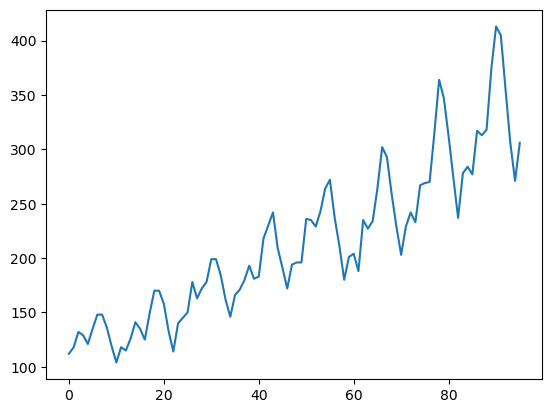

In [6]:
airlines_data.Passengers.plot()
plt.show()

## Splitting the Train and Test Data:-

In [7]:
train=airlines_data.head(80)
test=airlines_data.tail(16)
train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
75,2001-04-01,269
76,2001-05-01,270
77,2001-06-01,315
78,2001-07-01,364


In [8]:
test

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374


## Moving Average of the data:-

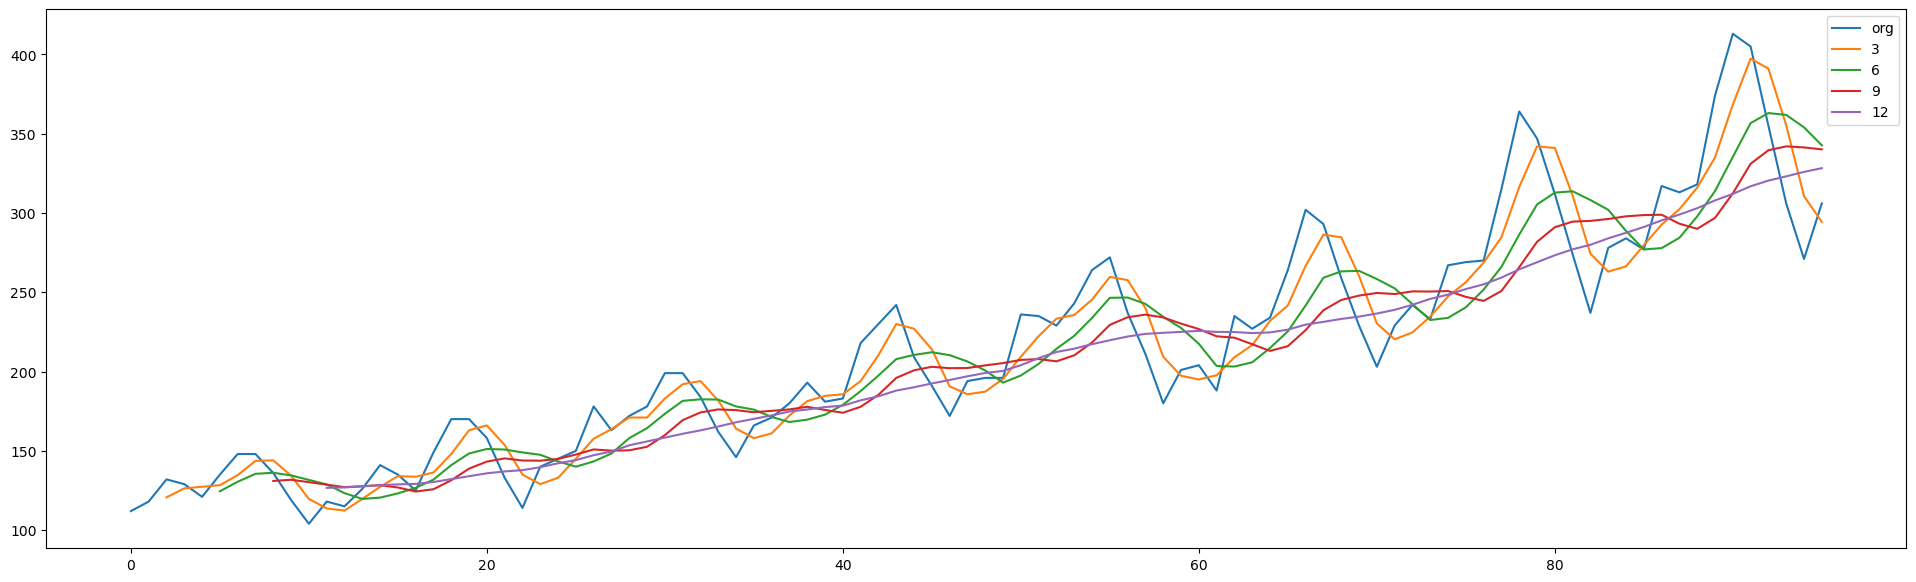

In [9]:
a=range(3,15,3)
plt.figure(figsize=(24,7))
airlines_data.Passengers.plot(label="org")
for i in a:
    airlines_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

## Time Series Decomposition Plot:- 

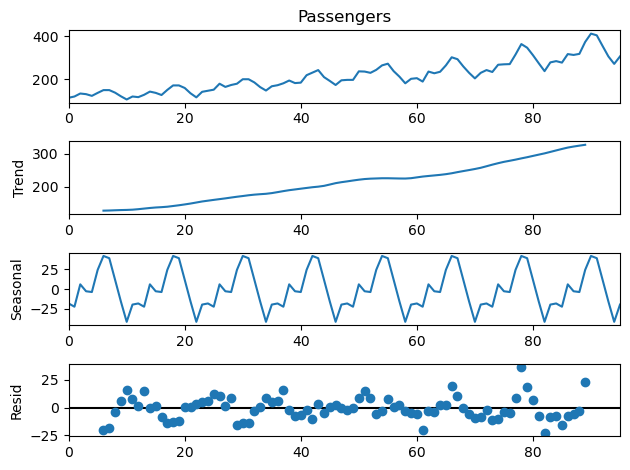

In [10]:
decompose_ts_add=seasonal_decompose(airlines_data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

## Autocorrelation Function(ACF) and Partial Autocorrelation Function(PACF) Plots:-

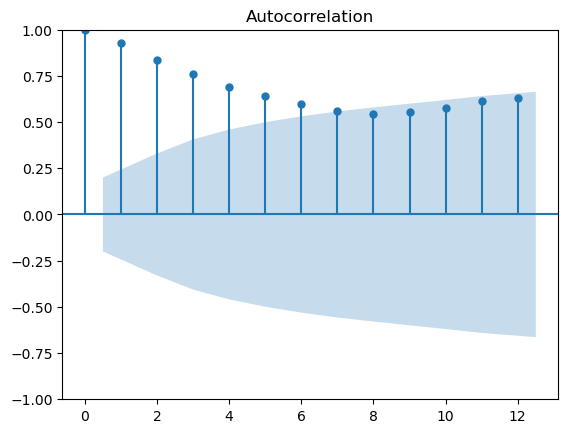

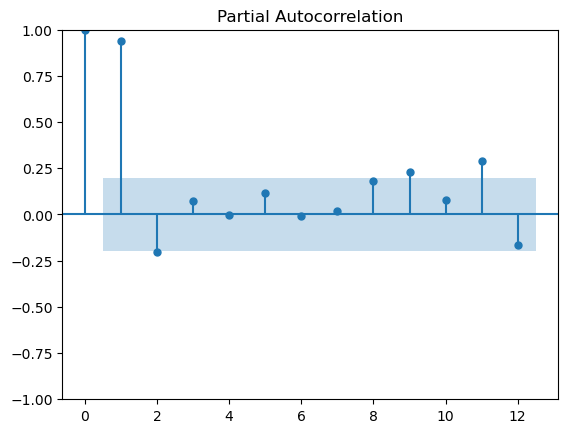

In [11]:
tsa_plots.plot_acf(airlines_data.Passengers,lags=12)
tsa_plots.plot_pacf(airlines_data.Passengers,lags=12)
plt.show()

## Evaluation Matrix - The Mean Absolute Percentage Error (MAPE):-

In [12]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [13]:
weights=np.array([0.1,0.2,0.3,0.4])

## Weighted Moving Average:-

In [14]:
df=pd.DataFrame()
df['Passengers']=airlines_data.Passengers
df['WMA']=df['Passengers'].rolling(4).apply(lambda x:np.sum(weights*x))
df

,Passengers,WMA
0,112,NaN
1,118,NaN
2,132,NaN
3,129,126.0
4,121,125.3
...,...,...
91,405,392.5
92,355,383.5
93,306,351.2
94,271,311.7


## Plotting/Mapping Weighted Moving Average:-

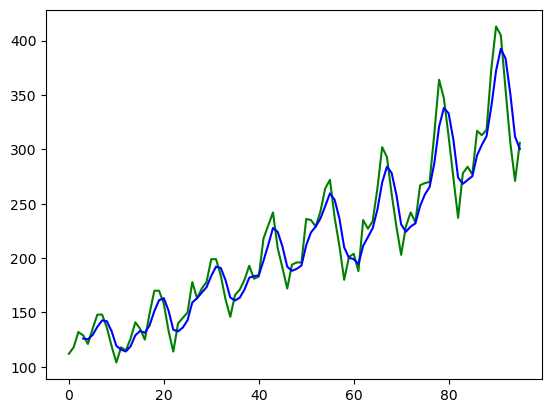

In [15]:
df.Passengers.plot(kind='line',color = 'green')
df.WMA.plot(kind='line', color = 'blue')
plt.legend
plt.show()

## Simple Exponential Method:-

In [16]:
ses_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Passengers)

11.375850554268187

## Plotting/Mapping - Predictions for Test Data:-

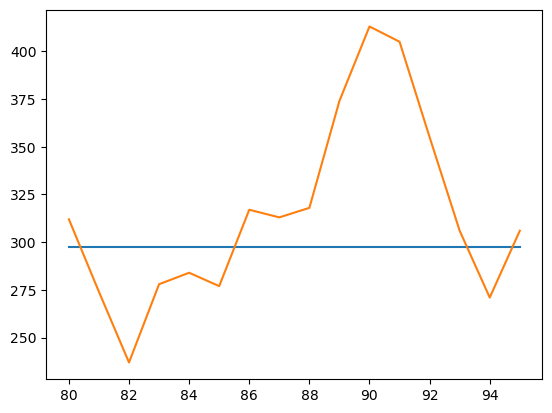

In [17]:
plt.plot(pred_ses)
plt.plot(test.Passengers)
plt.show()

## Plotting the Whole Data:-

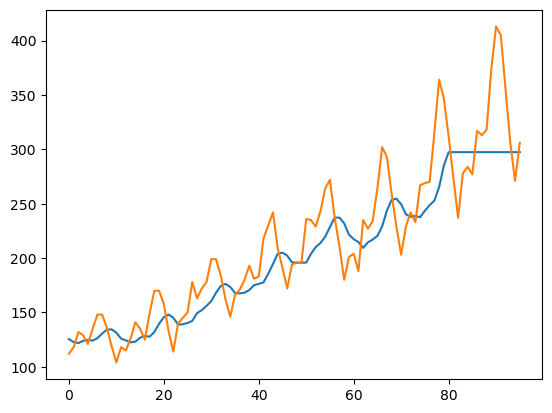

In [18]:
plt.plot(ses_model.predict(start=airlines_data.index[0],end=airlines_data.index[-1]))
plt.plot(airlines_data.Passengers)
plt.show()

## Finding the best Smoothing Level Value:-

In [19]:
acc_ses={}
for i in range(101):
    ses_model=SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=i/100)
    pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
    acc_ses[MAPE(pred_ses,test.Passengers)]=i
    
print('{}:{}'.format(acc_ses[min(acc_ses.keys())],min(acc_ses.keys())))

24:11.016377148078142


## Building a model with 0.23 as the Smoothing Level Values:-

In [20]:
ses_model=SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.24)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Passengers)

11.016377148078142

## Plotting the Predictions on Test Data:-

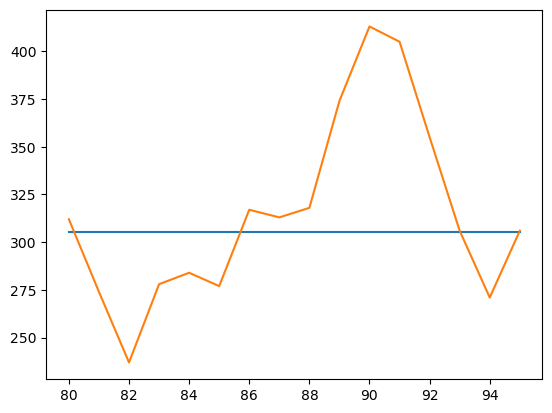

In [21]:
plt.plot(pred_ses)
plt.plot(test.Passengers)
plt.show()

## Plotting the Whole Data:-

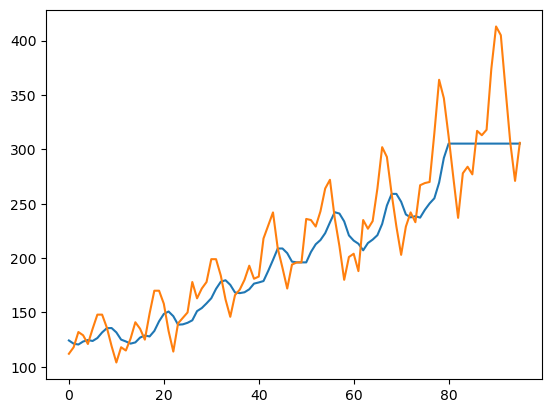

In [22]:
plt.plot(ses_model.predict(start=airlines_data.index[0],end=airlines_data.index[-1]))
plt.plot(airlines_data.Passengers)
plt.show()

## Building a Model with Holt Method:-

In [23]:
holt_model=Holt(train["Passengers"]).fit(smoothing_level=0.8,smoothing_slope=0.3)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_holt,test.Passengers)

59.933366922606936

## Plotting the Prediction on Test Data:-

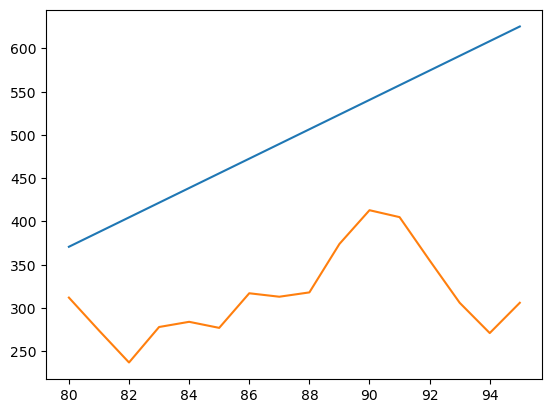

In [24]:
plt.plot(pred_holt)
plt.plot(test.Passengers)
plt.show()

## Plotting the Whole Data:-

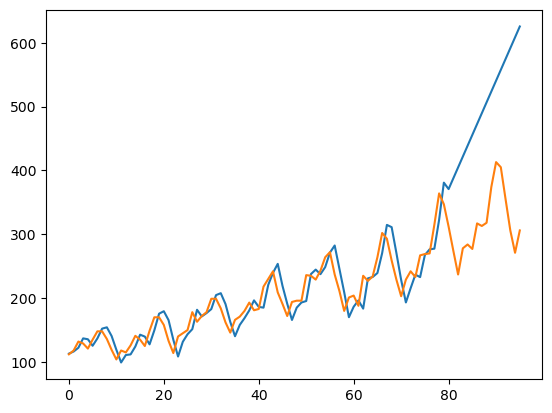

In [25]:
plt.plot(holt_model.predict(start=airlines_data.index[0],end=airlines_data.index[-1]))
plt.plot(airlines_data.Passengers)
plt.show()

## Finding the best Hyperparameters:-

In [26]:
accuracy={}
for i in range(0,101):
    for j in range(0,101):
        holt_model=Holt(train["Passengers"]).fit(smoothing_level=i/100,smoothing_slope=j/100)
        pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
        accuracy[MAPE(pred_holt,test.Passengers)]=(i,j)

In [27]:
accuracy[min(accuracy.keys())]

(2, 63)

In [28]:
min(accuracy.keys())

10.25753529177384

## Building a Model with Smoothing level = 0.02 and Smoothing Slope = 0.63.

In [29]:
holt_model=Holt(train["Passengers"]).fit(smoothing_level=0.02,smoothing_slope=0.63)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_holt,test.Passengers)

10.25753529177384

## Plotting the Predictions on Test Data:-

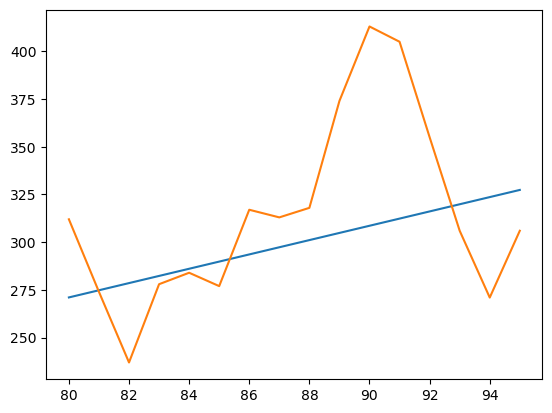

In [30]:
plt.plot(pred_holt)
plt.plot(test.Passengers)
plt.show()

## Plotting the Whole Data:-

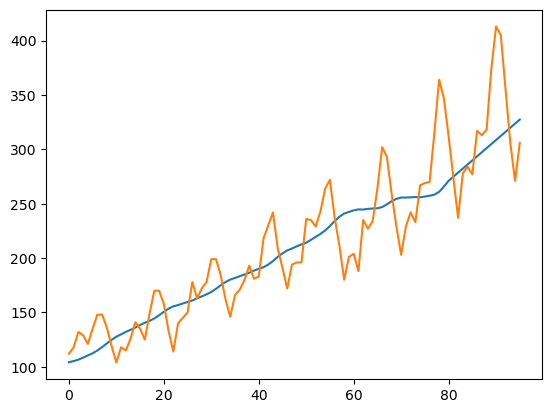

In [31]:
plt.plot(holt_model.predict(start=airlines_data.index[0],end=airlines_data.index[-1]))
plt.plot(airlines_data.Passengers)
plt.show()

## Building a Model Using Holt Winters Method:-

### The best seasonal period value is  = 12.

In [32]:
hw_add_add = ExponentialSmoothing(train["Passengers"],seasonal='add',seasonal_periods=12).fit()
pred_hw_add=hw_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw_add,test.Passengers)

6.528825253617974

## Plotting the Predictions on Test Data:-

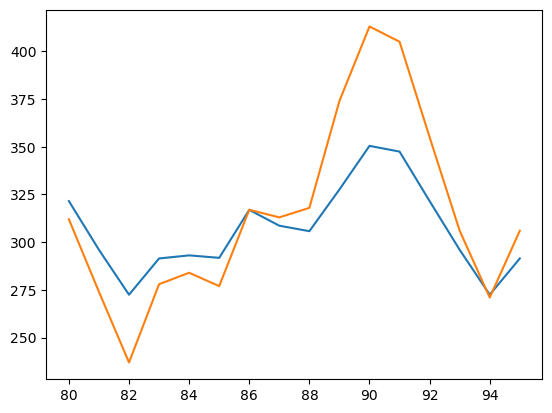

In [33]:
plt.plot(pred_hw_add)
plt.plot(test.Passengers)
plt.show()

## Plotting the Whole Data:-

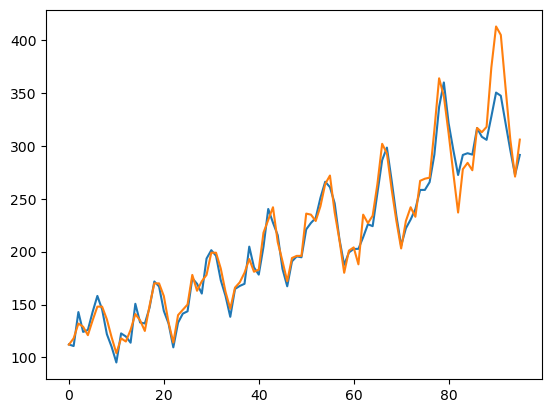

In [34]:
plt.plot(hw_add_add.predict(start=airlines_data.index[0],end=airlines_data.index[-1]))
plt.plot(airlines_data.Passengers)
plt.show()

## Finding the best Hyperparameters:-

In [35]:
params=['add','mul']
acc_hw={}
for i in params:
    for j in params:
        hw=ExponentialSmoothing(train["Passengers"],seasonal=i,trend=j,seasonal_periods=12).fit()
        pred_hw=hw.predict(start=test.index[0],end=test.index[-1])
        acc_hw[MAPE(pred_hw,test.Passengers)]=(i,j)

In [36]:
acc_hw[min(acc_hw.keys())]

('mul', 'mul')

In [37]:
min(acc_hw.keys())

1.8507570249713925

## Building a Model with Seasonality and Trend to be multiplicative:-

In [38]:
hw=ExponentialSmoothing(train["Passengers"],seasonal='mul',trend='mul',seasonal_periods=12).fit()
pred_hw=hw.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Passengers)

1.8507570249713925

## Plotting the Prediction on Test Data:-

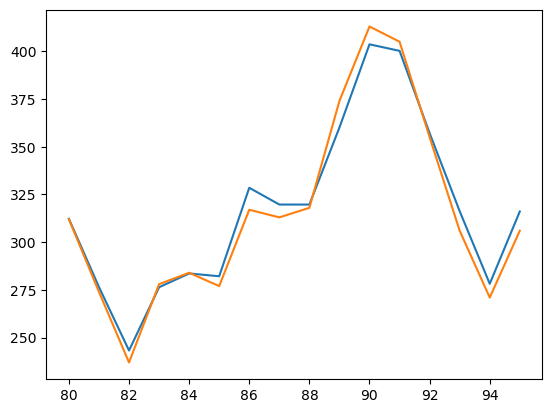

In [39]:
plt.plot(pred_hw)
plt.plot(test.Passengers)
plt.show()

## Plotting the Whole Data:-

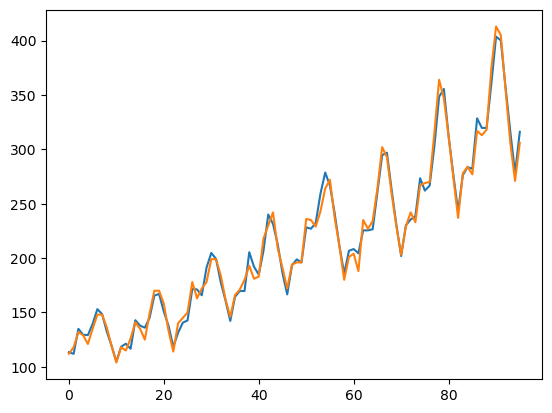

In [40]:
plt.plot(hw.predict(start=airlines_data.index[0],end=airlines_data.index[-1]))
plt.plot(airlines_data.Passengers)
plt.show()

## Conclusions:-

#### Simple Exponential Smoothing - The best smoothing level value is  0.24 and the model build on this value had an RMS error value is 11.01


##### Holt's Model - The best smoothing level value is 0.02 and smoothig slope value is 0.63. The model build on these parameters have an RMS error value is 10.25.

##### Holt-Winter-Method - Plotting both seasonal and trend to be multiplicative gives the best results. The model build with these parameters gives an RMS error is 1.85

### From these conclusions we find that Holt Winters Model is the preffered model to go.